In [148]:
import pandas as  pd
import numpy  as np
import random
import matplotlib.pyplot  as plt
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,  Conv2D, Flatten, MaxPooling2D

In [149]:
import  tensorflow as tf

In [150]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [151]:
y_train = np.loadtxt(r"C:\Users\Kedhar\Desktop\DATA SETS FOR ML\labels.csv", delimiter=',')
y_test = np.loadtxt(r"C:\Users\Kedhar\Desktop\DATA SETS FOR ML\labels_test.csv", delimiter=',')

In [152]:
x_test = np.loadtxt(r"C:\Users\Kedhar\Desktop\DATA SETS FOR ML\input_test.csv", delimiter=',')

In [153]:
x_train = np.loadtxt(r'C:\Users\Kedhar\Desktop\DATA SETS FOR ML\input.csv', delimiter=',')

In [154]:
print("shape of x_train",x_train.shape)
print("shape",  y_train.shape)
print("shape",x_test.shape)
print("shape",y_test.shape)

shape of x_train (2000, 30000)
shape (2000,)
shape (400, 30000)
shape (400,)


In [155]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train= x_train/255.0
x_test = x_test/255.0

In [156]:
x_train[1:3]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

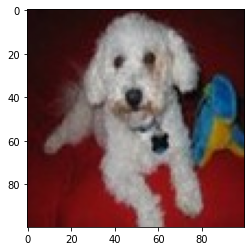

In [157]:
i = random.randint(0,len(x_train))
plt.imshow(x_train[i,:])
plt.show()

In [158]:
model =Sequential()

model.add(Conv2D(12,(3,3), activation='relu', input_shape =(100,100,3)))
model.add(Conv2D(10,(3,3), activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(8,(3,3), activation='relu'))
model.add(Conv2D(7,(3,3), activation='relu'))
model.add(Conv2D(4,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))






In [159]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 12)        336       
                                                                 
 conv2d_16 (Conv2D)          (None, 96, 96, 10)        1090      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 8)         728       
                                                                 
 conv2d_18 (Conv2D)          (None, 44, 44, 7)         511       
                                                                 
 conv2d_19 (Conv2D)          (None, 42, 42, 4)         256       
                                                      

In [160]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [161]:
model.fit(x_train,y_train,epochs = 40, batch_size=5)                                             

Epoch 1/40
400/400 [==============================] - 6s 12ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 2/40
400/400 [==============================] - 4s 10ms/step - loss: 0.6675 - accuracy: 0.5000
Epoch 3/40
400/400 [==============================] - 4s 9ms/step - loss: 0.6249 - accuracy: 0.5000
Epoch 4/40
400/400 [==============================] - 5s 12ms/step - loss: 0.5634 - accuracy: 0.5000
Epoch 5/40
400/400 [==============================] - 5s 12ms/step - loss: 0.4535 - accuracy: 0.5000
Epoch 6/40
400/400 [==============================] - 4s 9ms/step - loss: 0.2583 - accuracy: 0.5000
Epoch 7/40
400/400 [==============================] - 4s 10ms/step - loss: 0.0851 - accuracy: 0.5000
Epoch 8/40
400/400 [==============================] - 5s 11ms/step - loss: 0.0544 - accuracy: 0.5000
Epoch 9/40
400/400 [==============================] - 5s 12ms/step - loss: 0.0063 - accuracy: 0.5000
Epoch 10/40
400/400 [==============================] - 5s 12ms/step - loss: 0.0105 - accuracy

In [162]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 12ms/step - loss: 6.2515 - accuracy: 0.5000


[6.251541614532471, 0.5]

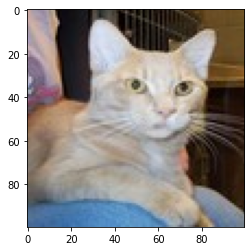

1/1 [==============================] - 0s 42ms/step
It is a: Dog


In [165]:
j  = random.randint(0,len(y_test))
plt.imshow(x_test[j,:])
plt.show()

y_pred = model.predict(x_test[j,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if (y_pred==0):
    pred ='Cat'
else:
    pred = 'Dog'
print("It is a:",pred)

                       